In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


#<h1> Data Loading</h1>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#movies dataset
dmovies="/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv"
movies=pd.read_csv(dmovies)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [ ]:
movies.head(2)

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN


In [ ]:
#sample dataset
dsample="/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv"
sample=pd.read_csv(dsample)
sample.head(2)

,id,sentiment
0,0,NEGATIVE
1,1,NEGATIVE


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         55315 non-null  int64 
 1   sentiment  55315 non-null  object
dtypes: int64(1), object(1)
memory usage: 864.4+ KB


In [ ]:
# test dataset
dtest="/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv"
test=pd.read_csv(dtest)
test.head(2)

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...


In [ ]:
# train dataset
dtrain="/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv"
train=pd.read_csv(dtrain)
train.head(2)

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE


In [ ]:
train.shape

(162758, 5)

##code to check merge
sum1=0
for i in train_count:
    tc=train.loc[train["movieid"]==i,:].loc[:,"movieid"].value_counts()[0]
    mc=movies.loc[movies["movieid"]==i,:].loc[:,"movieid"].value_counts()[0]
    sum1=sum1+(tc*mc)
    #print(sum1)
    
print(sum1)


#<h1> Data Merging </h1>

In [ ]:
df3=pd.merge(train,movies,left_on="movieid",right_on="movieid")
print(df3.shape)
df3.head(2)

(525277, 18)


,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525277 entries, 0 to 525276
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               525277 non-null  object 
 1   reviewerName          525277 non-null  object 
 2   isFrequentReviewer    525277 non-null  bool   
 3   reviewText            501460 non-null  object 
 4   sentiment             525277 non-null  object 
 5   title                 525277 non-null  object 
 6   audienceScore         224448 non-null  float64
 7   rating                134486 non-null  object 
 8   ratingContents        134486 non-null  object 
 9   releaseDateTheaters   182326 non-null  object 
 10  releaseDateStreaming  249433 non-null  object 
 11  runtimeMinutes        302589 non-null  float64
 12  genre                 307944 non-null  object 
 13  originalLanguage      304822 non-null  object 
 14  director              525277 non-null  object 
 15  

#<h2> Feature Engineering</h2>

In [ ]:
df31=df3.drop(["soundType","distributor","boxOffice","releaseDateStreaming","releaseDateTheaters","ratingContents"],axis=1)
df31.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director'],
      dtype='object')

In [ ]:
df31

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,runtimeMinutes,genre,originalLanguage,director
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,PG-13,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,65.0,PG-13,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,65.0,PG-13,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,65.0,PG-13,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
...,...,...,...,...,...,...,...,...,...,...,...,...
525272,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,The broad shape of the ending is predictable; ...,NEGATIVE,Frodo Baggins Norman Bates Ellen Ripley Astonish,81.0,NaN,111.0,"Crime, Drama",Filipino,Sara Maggard
525273,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,A formula designed for adolescent and young ad...,POSITIVE,Elegant Starlight Labyrinth Katniss Everdeen,75.0,NaN,93.0,"Horror, Mystery & thriller",Korean,Frances Gagne
525274,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,"All these years, I've kept a soft spot in my h...",NEGATIVE,Don Vito Corleone Neo Hannibal Lecter,55.0,NaN,96.0,Comedy,English,Claudia Bernhard
525275,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,Powerful documentary about the struggle of Wes...,POSITIVE,Dorothy Gale Luke Skywalker Luke Skywalker,75.0,NaN,89.0,Documentary,English,James Fanney


In [ ]:
df31.isnull().sum()

movieid                    0
reviewerName               0
isFrequentReviewer         0
reviewText             23817
sentiment                  0
title                      0
audienceScore         300829
rating                390791
runtimeMinutes        222688
genre                 217333
originalLanguage      220455
director                   0
dtype: int64

In [ ]:
df31["genre"].unique()

array(['Comedy, Animation, Adventure, Fantasy', 'Action',
       'Holiday, Romance, Comedy, Lgbtq+', ...,
       'Action, Horror, Sci-fi, Mystery & thriller, Animation',
       'Comedy, Kids & family, Variety',
       'Action, Crime, Drama, Horror, Mystery & thriller'], dtype=object)

In [ ]:
df32=df31.dropna(axis=0, thresh=8)
df32=df32.reset_index()
print(df32.shape, df31.shape)

(310446, 13) (525277, 12)


In [ ]:
df32.isnull().sum()/df32.shape[0]

index                 0.000000
movieid               0.000000
reviewerName          0.000000
isFrequentReviewer    0.000000
reviewText            0.042217
sentiment             0.000000
title                 0.000000
audienceScore         0.277307
rating                0.566797
runtimeMinutes        0.025322
genre                 0.008079
originalLanguage      0.018116
director              0.000000
dtype: float64

In [ ]:
# code to fill missing reviews by  corresponding moviename
# it will take 1 min approx

df32["reviewText"]=df32["reviewText"].fillna(df32["movieid"])
df33=df32

In [ ]:
df33.isna().sum()

index                      0
movieid                    0
reviewerName               0
isFrequentReviewer         0
reviewText                 0
sentiment                  0
title                      0
audienceScore          86089
rating                175960
runtimeMinutes          7861
genre                   2508
originalLanguage        5624
director                   0
dtype: int64

In [ ]:
# impute for bool

#<h1> Feature Imputation and Scaling </h1>

In [ ]:
cat_col=df33.select_dtypes(include=["object"]).columns
print("categorical col ",cat_col)
bool_col=df33.select_dtypes(include=["bool"]).columns
print("bool col ",bool_col)
num_col=df33.select_dtypes(exclude=["object","bool"]).columns
print("numerical col ",num_col)

categorical col  Index(['movieid', 'reviewerName', 'reviewText', 'sentiment', 'title', 'rating',
       'genre', 'originalLanguage', 'director'],
      dtype='object')
bool col  Index(['isFrequentReviewer'], dtype='object')
numerical col  Index(['index', 'audienceScore', 'runtimeMinutes'], dtype='object')


In [ ]:
df33.loc[df33["reviewText"]==df33["movieid"],["movieid","reviewText",]]

,movieid,reviewText
28,tony_montana_frodo_baggins_v_rocky_balboa,tony_montana_frodo_baggins_v_rocky_balboa
29,tony_montana_frodo_baggins_v_rocky_balboa,tony_montana_frodo_baggins_v_rocky_balboa
496,kingdom_dazzling_beneath_fortune,kingdom_dazzling_beneath_fortune
497,kingdom_dazzling_beneath_fortune,kingdom_dazzling_beneath_fortune
500,kingdom_dazzling_beneath_fortune,kingdom_dazzling_beneath_fortune
...,...,...
310402,emerald_jack_torrance_james_bond_don_vito_corl...,emerald_jack_torrance_james_bond_don_vito_corl...
310406,terminator_james_bond_jack_sparrow,terminator_james_bond_jack_sparrow
310409,eclipse_oracle_epic_the_joker,eclipse_oracle_epic_the_joker
310410,eclipse_oracle_epic_the_joker,eclipse_oracle_epic_the_joker


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer # for y var, same as one-hot
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# dierntiating oridinal and label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
x=np.array(["a","b","c","c"]).reshape(-1,1)
le=LabelEncoder()
oe=OrdinalEncoder(categories=[["b","c","a"]])
oe.fit_transform(x)

array([[2.],
       [0.],
       [1.],
       [1.]])

In [ ]:
cat_imp_pipe=Pipeline([("simp_imputer",SimpleImputer(strategy="most_frequent"))])
cat_imp_pipe1=Pipeline([("knn_imp",KNNImputer(n_neighbors=3))]) # n-impute based on distance between points
cat_encoder_pipe=Pipeline([("encoder", LabelEncoder())])
num_imp_pipe=Pipeline([("imputer",SimpleImputer(strategy="mean"))])
norm_pip=Pipeline([("minmaxscaler",MinMaxScaler())])

In [ ]:
column_transform1=ColumnTransformer([("cat_impute",cat_imp_pipe,cat_col),("num_imp",num_imp_pipe,num_col[1:])])
column_transform2=ColumnTransformer([("num_imp",norm_pip,num_col)])



In [ ]:
# transformation using featureunion
from sklearn import set_config
set_config(display="daigram")
FeatureUnion([("cat_pipe",cat_imp_pipe)])

FeatureUnion(transformer_list=[('cat_pipe',
                                Pipeline(steps=[('imputer',
                                                 SimpleImputer(strategy='most_frequent'))]))])

In [ ]:
new_col=cat_col.append(num_col[1:])
new_col

Index(['movieid', 'reviewerName', 'reviewText', 'sentiment', 'title', 'rating',
       'genre', 'originalLanguage', 'director', 'audienceScore',
       'runtimeMinutes'],
      dtype='object')

In [ ]:
df40=pd.DataFrame(column_transform1.fit_transform(df33),columns=new_col)
df40["runtimeMinutes"]=pd.to_numeric(df40["runtimeMinutes"])
df40["audienceScore"]=pd.to_numeric(df40["audienceScore"])
df4=pd.DataFrame(column_transform1.fit_transform(df40),columns=new_col)
df4["runtimeMinutes"]=pd.to_numeric(df4["runtimeMinutes"])
df4["audienceScore"]=pd.to_numeric(df4["audienceScore"])
df4.head()

,movieid,reviewerName,reviewText,sentiment,title,rating,genre,originalLanguage,director,audienceScore,runtimeMinutes
0,marvelous_pirate,Benjamin Henry,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,PG-13,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,65.0,105.0
1,marvelous_pirate,Sharon Foster,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,PG-13,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,65.0,105.0
2,marvelous_pirate,Melinda Dunn,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,PG-13,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,65.0,105.0
3,marvelous_pirate,Mr. Wayne Smith,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,PG-13,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,65.0,105.0
4,marvelous_pirate,Connor Nelson,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,PG-13,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,65.0,105.0


<Axes: ylabel='Density'>

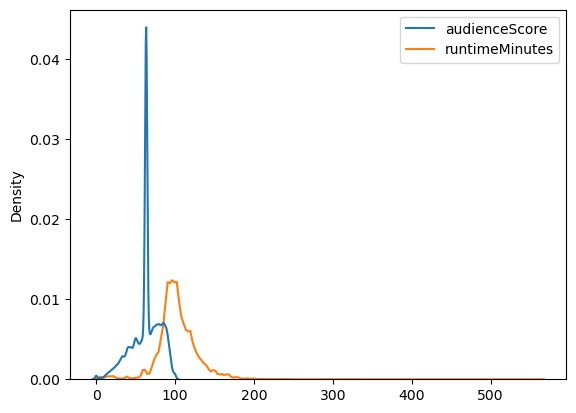

In [ ]:
sns.kdeplot(df4.select_dtypes(include=["float64"]))

In [ ]:
le=LabelEncoder()
df4[cat_col]=df4[cat_col].apply(le.fit_transform)
column_transform2=ColumnTransformer([("num_imp",num_imp_pipe,df4.columns)])
column_transform22=ColumnTransformer([("num_imp",norm_pip,df4.columns)])
df51=pd.DataFrame(column_transform22.fit_transform(df4),columns=df4.columns)


In [ ]:
df51.describe()

,movieid,reviewerName,reviewText,sentiment,title,rating,genre,originalLanguage,director,audienceScore,runtimeMinutes
count,310446.000000,310446.000000,310446.000000,310446.000000,310446.000000,310446.000000,310446.000000,310446.000000,310446.000000,310446.000000,310446.000000
mean,0.460630,0.515620,0.510835,0.664144,0.460630,0.457777,0.457706,0.252314,0.501563,0.632894,0.179887
std,0.280119,0.284448,0.294133,0.472289,0.280120,0.096913,0.261684,0.149073,0.287027,0.178754,0.046010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240265,0.271936,0.256027,0.000000,0.240265,0.500000,0.251121,0.200000,0.252654,0.550000,0.157424
50%,0.409341,0.521322,0.515119,1.000000,0.409341,0.500000,0.387145,0.200000,0.494226,0.632894,0.175313
75%,0.695891,0.756642,0.769163,1.000000,0.695891,0.500000,0.653214,0.200000,0.754398,0.760000,0.202147
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#unction transform: to transform data using a user definded function
from sklearn.preprocessing import FunctionTransformer

def f1(data):
    return np.log1p(data)

func=FunctionTransformer(func=f1,validate=False)
df52=func.fit_transform(df51)

In [ ]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)

n=poly.fit_transform(df52)
df5=pd.DataFrame(n, columns=poly.get_feature_names_out(df52.columns),index=df52.index).drop(['1'],axis=1)

In [ ]:
df5["sentiment"]=LabelEncoder().fit_transform(df5["sentiment"])

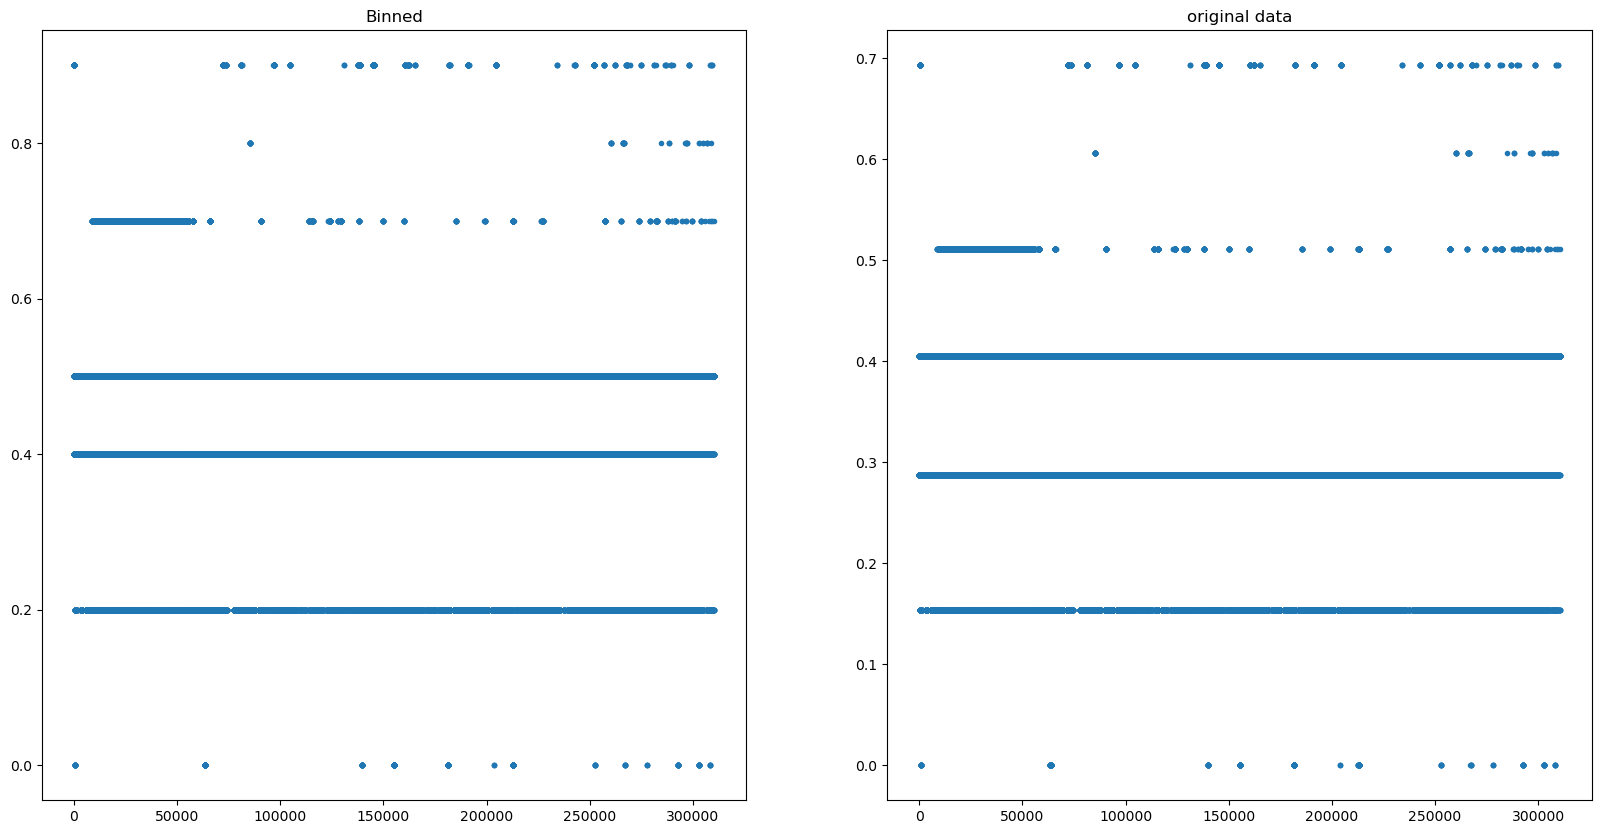

In [ ]:
# binning
from sklearn.preprocessing import KBinsDiscretizer
bin=KBinsDiscretizer(n_bins=10, encode="ordinal",strategy="uniform")

n7=bin.fit_transform(np.array(df5["rating"]).reshape(-1,1))/10

plt.subplots(1,2, figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(n7,".")
plt.title("Binned")
plt.subplot(1,2,2)
plt.plot(df5["rating"],".")
plt.title("original data")

df5["rating"]=pd.Series(n7.reshape(1,-1)[0])

#<h1> Visualization </h1>

<Axes: ylabel='Density'>

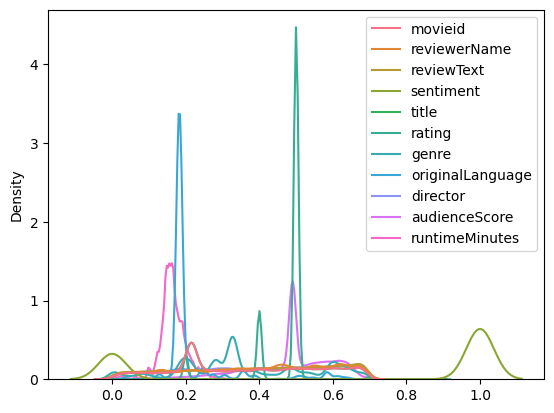

In [ ]:
sns.kdeplot(df5)

In [ ]:
df5.var()

movieid             0.036382
reviewerName        0.037486
reviewText          0.040228
sentiment           0.223057
title               0.036382
rating              0.006336
genre               0.031778
originalLanguage    0.010593
director            0.038332
audienceScore       0.013301
runtimeMinutes      0.001486
dtype: float64

In [ ]:
df5["sentiment"].unique()

array([1, 0])

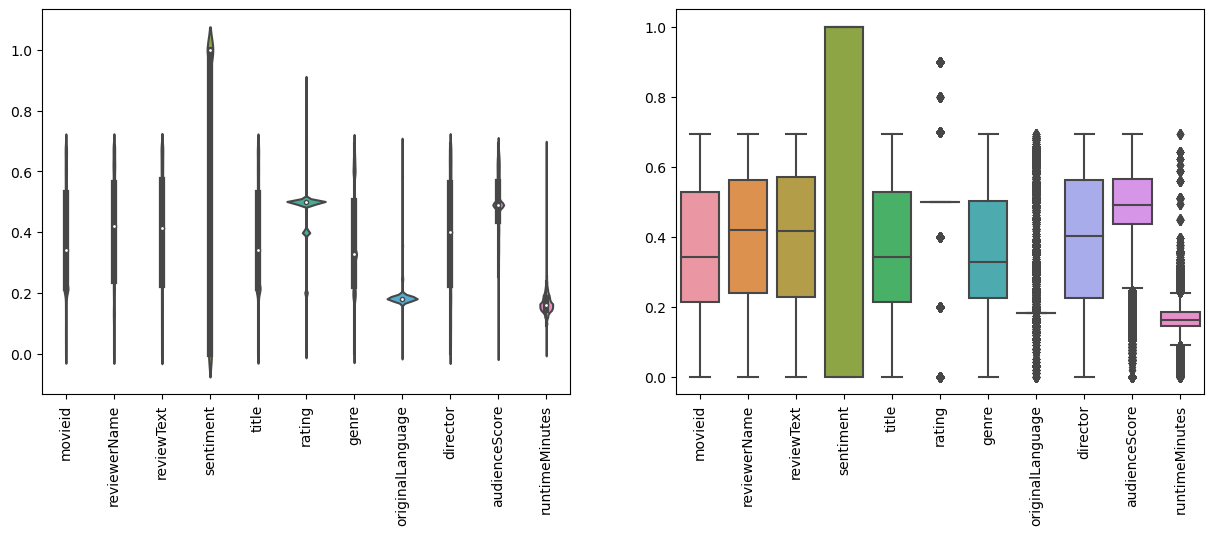

In [ ]:
plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
plot2=sns.violinplot(df5)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90);
plt.subplot(1,2,2)
plot1=sns.boxplot(df5)
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90);

<Axes: >

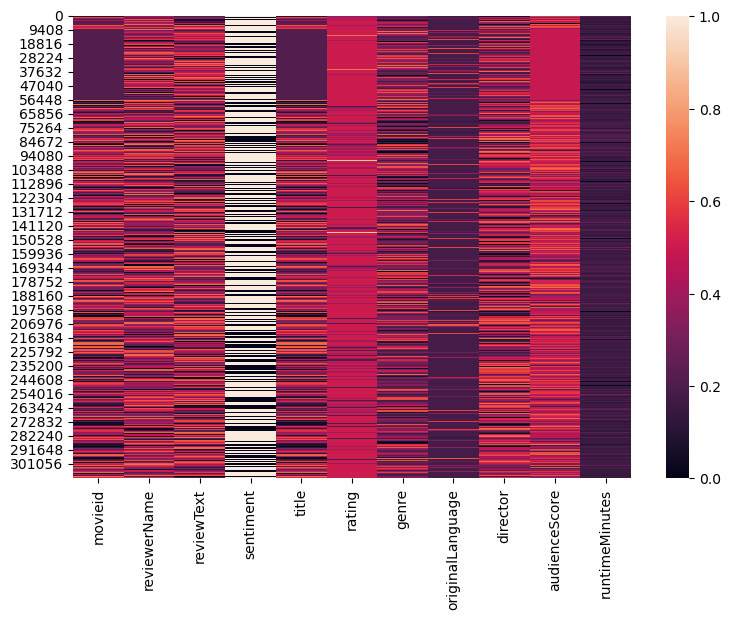

In [ ]:
im, axis=plt.subplots(figsize=(9,6))
sns.heatmap(df5)

In [ ]:
# Useful for applying a non-linear transformation to the target y in regression problems.
ttr=TransformedTargetRegressor()

#bold text<h1> Feature Selection </h1>

In [ ]:
# eature selection using variance: var must be greater than threshold
from sklearn.feature_selection import VarianceThreshold
vat= VarianceThreshold(threshold=0)
new_data=vat.fit_transform(df5)
df6=pd.DataFrame(new_data, columns=vat.feature_names_in_)

In [ ]:
df6

,movieid,reviewerName,reviewText,sentiment,title,rating,genre,originalLanguage,director,audienceScore,runtimeMinutes
0,0.473789,0.096953,0.296061,1.0,0.473789,0.4,0.204130,0.182322,0.072629,0.500775,0.169116
1,0.473789,0.621304,0.015868,0.0,0.473789,0.4,0.204130,0.182322,0.072629,0.500775,0.169116
2,0.473789,0.509753,0.572643,1.0,0.473789,0.4,0.204130,0.182322,0.072629,0.500775,0.169116
3,0.473789,0.538699,0.635233,0.0,0.473789,0.4,0.204130,0.182322,0.072629,0.500775,0.169116
4,0.473789,0.194379,0.271052,1.0,0.473789,0.4,0.204130,0.182322,0.072629,0.500775,0.169116
...,...,...,...,...,...,...,...,...,...,...,...
310441,0.254329,0.339561,0.528193,0.0,0.254329,0.5,0.268440,0.216808,0.617506,0.593327,0.178139
310442,0.160648,0.293526,0.065215,1.0,0.160648,0.5,0.493638,0.387766,0.274459,0.559616,0.150823
310443,0.117783,0.404497,0.126203,0.0,0.117783,0.5,0.191250,0.182322,0.154981,0.438255,0.155428
310444,0.130496,0.589001,0.465999,1.0,0.130496,0.5,0.283751,0.182322,0.336074,0.559616,0.144650


In [ ]:
x=df6.drop(["sentiment"], axis=1)
y=df6["sentiment"]

In [ ]:
# feature selection using mutual_info_regression
from sklearn.feature_selection import mutual_info_regression
mir_data=mutual_info_regression(x,y)
mir_data

array([0.1264992 , 0.06512996, 0.30510684, 0.13030737, 0.00242746,
       0.02020788, 0.00444974, 0.07715749, 0.03025501, 0.00254468])

In [ ]:
# feature selection using selectkbest
from sklearn.feature_selection import SelectKBest, chi2
skb1=SelectKBest(chi2,k=10)
skb2=SelectKBest(mutual_info_regression, k=10)


skb_data=skb1.fit_transform(x,y)
skb_data.shape

(310446, 10)

In [ ]:
# feature selection based on percentile
from sklearn.feature_selection import SelectPercentile, chi2
sp=SelectPercentile(chi2, percentile=100) # percentile= n% of fetaure keep
sp_data=sp.fit_transform(x,y)
sp_data.shape

(310446, 10)

In [ ]:
# feature selection using recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

rfe=RFE(estimator=model,n_features_to_select=10, step=2) # step says how many we should eleiminate ata time
rfe.fit_transform(x,y)

# true says feature is selected, false says it unselected
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# feature selection using  SequentialFeatureSelection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
sfs=SequentialFeatureSelector(estimator=model,n_features_to_select=9, direction="backward")
sfs.fit(x,y)

# true says feature is selected, false says it unselected
sfs.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [ ]:
df6.corr()

,movieid,reviewerName,reviewText,sentiment,title,rating,genre,originalLanguage,director,audienceScore,runtimeMinutes
movieid,1.000000,-0.000403,-0.006585,0.001294,1.000000,-0.051615,-0.020155,-0.035183,0.004550,-0.000235,0.035382
reviewerName,-0.000403,1.000000,-0.002978,-0.013977,-0.000399,-0.003133,-0.000307,-0.000175,0.000992,-0.003367,-0.002354
reviewText,-0.006585,-0.002978,1.000000,-0.043152,-0.006584,0.014855,0.002611,-0.003447,-0.001713,-0.011519,-0.006024
sentiment,0.001294,-0.013977,-0.043152,1.000000,0.001286,0.028648,-0.013100,0.043136,-0.000689,0.209117,0.031810
title,1.000000,-0.000399,-0.006584,0.001286,1.000000,-0.051616,-0.020156,-0.035175,0.004564,-0.000236,0.035386
rating,-0.051615,-0.003133,0.014855,0.028648,-0.051616,1.000000,-0.082995,0.100895,-0.032764,-0.060217,-0.077535
genre,-0.020155,-0.000307,0.002611,-0.013100,-0.020156,-0.082995,1.000000,-0.073402,-0.021496,-0.070745,-0.085500
originalLanguage,-0.035183,-0.000175,-0.003447,0.043136,-0.035175,0.100895,-0.073402,1.000000,0.024887,0.067818,0.089860
director,0.004550,0.000992,-0.001713,-0.000689,0.004564,-0.032764,-0.021496,0.024887,1.000000,0.010704,0.041385
audienceScore,-0.000235,-0.003367,-0.011519,0.209117,-0.000236,-0.060217,-0.070745,0.067818,0.010704,1.000000,0.173820


<h1> model </h1>

In [ ]:
# train test split
# from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.25)
for train_index,test_index in sss.split(df6,df6["sentiment"]):
    sss_train=df6.iloc[train_index]
    sss_test=df6.iloc[test_index]

In [ ]:
# dummy classiier
model=DummyClassifier(strategy="most_frequent")
model.fit(sss_train.drop(["sentiment"], axis=1),sss_train["sentiment"])
pred=model.predict(sss_test.drop(["sentiment"], axis=1))

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from  sklearn.svm import SVC
model0=SVC()
model1=LogisticRegression()


In [ ]:
model1.fit(sss_train.drop(["sentiment"], axis=1),sss_train["sentiment"])
pred1=model1.predict(sss_test.drop(["sentiment"], axis=1))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred1,sss_test["sentiment"])

0.6723960212338298

<h3> Hyper paramer tuning </h3>
<ul>
    <li> grid search </li>
    <li> Randomnizedsearch </li>
 </ul>

In [ ]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=SVC(),
                  param_grid={"kernel":["linear","poly"],
                              "degree":[1,5],
                              "C":[0.1,8]
                             },
                  verbose=2,
                  scoring="accuracy"
                 )

In [ ]:
#grid.fit(sss_train.drop(["sentiment"], axis=1),sss_train["sentiment"])

<h3> Test </h3>

In [ ]:
df7=pd.merge(test,movies,left_on="movieid",right_on="movieid")
print(df7.shape)
df7.head(2)

(172615, 17)


,movieid,reviewerName,isTopCritic,reviewText,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
1,legend_marty_mcfly_oracle,Kathleen Poole,False,Considering this is the 13th Halloween movie&#...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos


In [ ]:
new_col1=['movieid', 'reviewerName', 'reviewText', 'title', 'rating',
       'genre', 'originalLanguage', 'director', 'audienceScore',
       'runtimeMinutes']

df71=df7[new_col1].dropna(axis=0, thresh=8)
df72=df71.reset_index()

print(df71.shape, df72.shape)

(98631, 10) (98631, 11)


In [ ]:
# code to fill missing reviews by moviename
# it will take 1 min approx

import warnings
warnings.filterwarnings('ignore')
import math

def reviewImpute(df7):
    data=df7.loc[:,"reviewText"]
    base=df7.loc[:,"movieid"]
    for i in range(data.shape[0]):
        if type(data[i])!=str:
            if math.isnan(data[i]):
                data.update(pd.Series([base[i]],index=[i]))
    df7["reviewText"]=data
    #df7=df7.drop(["index"],axis=1)
    return df7
df73=reviewImpute(df7)

In [ ]:
cat_col=df73.select_dtypes(include=["object"]).columns
print("categorical col ",cat_col)
bool_col=df73.select_dtypes(include=["bool"]).columns
print("bool col ",bool_col)
num_col=df73.select_dtypes(exclude=["object","bool"]).columns
print("numerical col ",num_col)

new_col=cat_col.append(num_col)
new_col

categorical col  Index(['movieid', 'reviewerName', 'reviewText', 'title', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')
bool col  Index(['isTopCritic'], dtype='object')
numerical col  Index(['audienceScore', 'runtimeMinutes'], dtype='object')


Index(['movieid', 'reviewerName', 'reviewText', 'title', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType', 'audienceScore', 'runtimeMinutes'],
      dtype='object')

In [ ]:
num_imp_pipe=Pipeline([("imputer",SimpleImputer(strategy="mean"))])
cat_imp_pipe=Pipeline([("imputer",SimpleImputer(strategy="most_frequent"))])
column_transform1=ColumnTransformer([("cat_impute",cat_imp_pipe,cat_col),("num_imp",num_imp_pipe,num_col)])

df74=pd.DataFrame(column_transform1.fit_transform(df73),columns=new_col)
# df74["runtimeMinutes"]=pd.to_numeric(df74["runtimeMinutes"])
# df74["audienceScore"]=pd.to_numeric(df74["audienceScore"])
df74.head()

,movieid,reviewerName,reviewText,title,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,genre,originalLanguage,director,boxOffice,distributor,soundType,audienceScore,runtimeMinutes
0,legend_marty_mcfly_oracle,John Kim,Green slowly cranks up the dread with style an...,Legend Marty McFly Oracle,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos,57.0,111.0
1,legend_marty_mcfly_oracle,Kathleen Poole,Considering this is the 13th Halloween movie&#...,Legend Marty McFly Oracle,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos,57.0,111.0
2,legend_marty_mcfly_oracle,Kenneth Lamb,Halloween Ends is by no means the worst horror...,Legend Marty McFly Oracle,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos,57.0,111.0
3,legend_marty_mcfly_oracle,Brittany Lane,A concluding chapter that shares more DNA with...,Legend Marty McFly Oracle,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos,57.0,111.0
4,legend_marty_mcfly_oracle,Yolanda Thomas,For a film called Halloween Ends&#44; let&#821...,Legend Marty McFly Oracle,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos,57.0,111.0


In [ ]:
df74.isna().sum()

movieid                 0
reviewerName            0
reviewText              0
title                   0
rating                  0
ratingContents          0
releaseDateTheaters     0
releaseDateStreaming    0
genre                   0
originalLanguage        0
director                0
boxOffice               0
distributor             0
soundType               0
audienceScore           0
runtimeMinutes          0
dtype: int64

In [ ]:
le=LabelEncoder()
df74[cat_col]=df74[cat_col].apply(le.fit_transform)

num_imp_pipe1=Pipeline([("imputer",SimpleImputer(strategy="mean")),("norm",MinMaxScaler())])
column_transform2=ColumnTransformer([("num_imp",num_imp_pipe1,df74.columns)])
df75=pd.DataFrame(column_transform2.fit_transform(df74),columns=df74.columns)
df75

,movieid,reviewerName,reviewText,title,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,genre,originalLanguage,director,boxOffice,distributor,soundType,audienceScore,runtimeMinutes
0,0.551028,0.467957,0.330256,0.551028,0.500000,0.168158,0.988726,0.972265,0.592066,0.191489,0.853385,0.781809,0.900835,0.136364,0.570000,0.194991
1,0.551028,0.526257,0.232334,0.551028,0.500000,0.168158,0.988726,0.972265,0.592066,0.191489,0.853385,0.781809,0.900835,0.136364,0.570000,0.194991
2,0.551028,0.548064,0.333704,0.551028,0.500000,0.168158,0.988726,0.972265,0.592066,0.191489,0.853385,0.781809,0.900835,0.136364,0.570000,0.194991
3,0.551028,0.141522,0.052382,0.551028,0.500000,0.168158,0.988726,0.972265,0.592066,0.191489,0.853385,0.781809,0.900835,0.136364,0.570000,0.194991
4,0.551028,0.995772,0.305260,0.551028,0.500000,0.168158,0.988726,0.972265,0.592066,0.191489,0.853385,0.781809,0.900835,0.136364,0.570000,0.194991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172610,0.736074,0.951268,0.810870,0.736074,0.333333,0.922632,0.874011,0.528197,0.200599,0.340426,0.570355,0.724067,0.347077,0.192149,0.510000,0.171735
172611,0.028359,0.518469,0.481673,0.028359,0.500000,0.774981,0.937698,0.755316,0.386228,0.191489,0.993866,0.001022,0.590814,0.192149,0.530000,0.216458
172612,0.322014,0.366489,0.159153,0.322014,0.500000,0.459918,0.889834,0.271495,0.211078,0.191489,0.854689,0.750128,0.945720,0.353306,0.300000,0.171735
172613,0.002264,0.261905,0.851375,0.002264,0.166667,0.038963,0.889834,0.340216,0.725299,0.265957,0.716356,0.001022,0.945720,0.192149,0.630721,0.161002


In [ ]:
pred_new=model.predict(df75)
pd.DataFrame(pred_new).to_csv("submission.csv",index=False)